In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../../../data/uspatentcitation.tsv', delimiter='\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8798918 entries, 0 to 8798917
Data columns (total 9 columns):
uuid           object
patent_id      object
citation_id    object
date           object
name           object
kind           object
country        object
category       object
sequence       float64
dtypes: float64(1), object(8)
memory usage: 604.2+ MB


In [5]:
df.head()

,uuid,patent_id,citation_id,date,name,kind,country,category,sequence
0,00000jd7thmiucpaol1hm1835,5354551,4875247,1989-10-01,Berg,NaN,US,NaN,11.0
1,00001005a7ti553pqlju1r2zo,9504742,4666886,1987-05-01,Baschang et al.,A,US,cited by applicant,5.0
2,00002ghv7v87txbmryocp9i60,D490798,D190749,1961-06-01,Matri et al.,S,US,cited by examiner,1.0
3,000034l12awrqow221x9q9jhl,8385913,7991644,2011-08-01,Bryant et al.,B2,US,cited by applicant,38.0
4,000041tx55fp5d0rqjofqfp5f,8695863,4683810,1987-08-01,Afimiwala,A,US,cited by examiner,3.0


In [15]:
edges = df[['patent_id','citation_id']].head(500)
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
patent_id      500 non-null object
citation_id    500 non-null object
dtypes: object(2)
memory usage: 7.9+ KB


In [16]:
import networkx as nx
%matplotlib inline

G = nx.from_pandas_edgelist(edges, source='patent_id', target='citation_id')

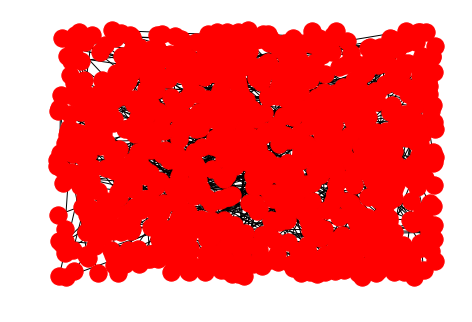

In [27]:
nx.draw_random(G)

In [18]:
nx.degree_histogram(G)

[0, 996, 2]

In [19]:
nx.density(G)

0.001005019065211667

## Some Algorithms...

In [33]:
from networkx.algorithms import approximation

k_components = approximation.k_components(G)

for i in k_components:
    print(len(k_components[i]))

498


## Patent Data Queries

In [56]:
import requests

r = requests.post(
    'http://www.patentsview.org/api/patents/query',
    json={
        "q":{"patent_number":"5354551"},
        "f":["patent_number", "patent_title"]
    }
)
info = r.json()
info['patents']

[{'patent_number': '5354551',
  'patent_title': 'Oral and dental hygiene preparation'}]

## Adding node info to the graph

In [57]:
list(G.nodes)[:10]

['5354551',
 '4875247',
 '9504742',
 '4666886',
 'D490798',
 'D190749',
 '8385913',
 '7991644',
 '8695863',
 '4683810']

In [64]:
r = requests.post(
    'http://www.patentsview.org/api/patents/query',
    json={
        "q":{"patent_number":[str(x) for x in list(G.nodes)]},
        "f":["patent_number", "patent_title"]
    }
)
r.raw.read()
# info = r.json()
# info['patents']
    
# list(G.nodes(data=True))

b''